## Imports and Setup

In [1]:
import os
import sys
sys.path.insert(0, "../utils/")
import cnn_utils
import config_utils

import pandas as pd
import numpy as np
import geopandas as gpd

import torch

pd.set_option('mode.chained_assignment', None)
%load_ext autoreload
%autoreload 2

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Load Configuration

In [2]:
iso = "SEN"
config_file = "configs/cnn_configs/convnext_small.yaml"

cwd = os.path.dirname(os.getcwd())
config = config_utils.load_config(os.path.join(cwd, config_file))
config["iso_codes"] = [iso]
data, data_loader, classes = cnn_utils.load_dataset(config, phases=["train", "test"])

INFO:root:Reading file /home/itingzon.unicef/giga/data/vectors/train/SEN_train.geojson
INFO:root:
  rurban  iso       class  count  percentage
0  rural  SEN  non_school   4432    0.274904
1  rural  SEN      school   4584    0.284332
2  urban  SEN  non_school   4613    0.286131
3  urban  SEN      school   2493    0.154633
INFO:root:
                               count  percentage
rurban iso class      dataset                   
rural  SEN non_school test       870    0.269851
                      train     3562         NaN
           school     test       932    0.289082
                      train     3652         NaN
urban  SEN non_school test       911    0.282568
                      train     3702         NaN
           school     test       510    0.158189
                      train     1983         NaN
INFO:root:
                    count
dataset class            
test    non_school   1781
        school       1442
train   non_school   7264
        school       5635
INFO:root

## Visualize Samples

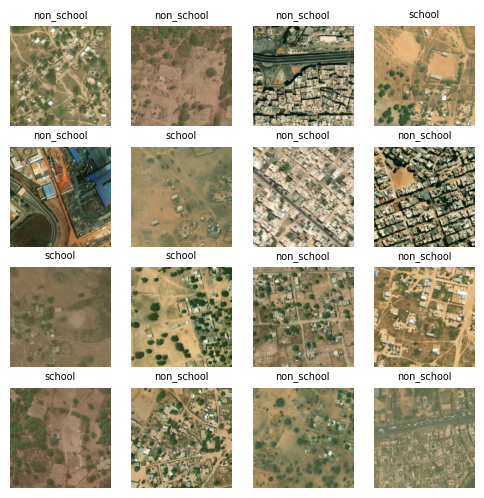

In [5]:
cnn_utils.visualize_data(data, data_loader, phase='train')

## Load Model

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model, criterion, optimizer, scheduler = cnn_utils.load_model(
    n_classes=len(classes),
    model_type=config["model"],
    pretrained=config["pretrained"],
    scheduler_type=config["scheduler"],
    optimizer_type=config["optimizer"],
    label_smoothing=config["label_smoothing"],
    lr=config["lr"],
    momentum=config["momentum"],
    gamma=config["gamma"],
    step_size=config["step_size"],
    patience=config["patience"],
    dropout=config["dropout"],
    device=device,
)
model

Downloading: "https://download.pytorch.org/models/convnext_small-0c510722.pth" to /home/itingzon.unicef/.cache/torch/hub/checkpoints/convnext_small-0c510722.pth
100%|█████████████████████████████████████████████████████████████████████████████████| 192M/192M [00:01<00:00, 104MB/s]


ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=